<a href="https://colab.research.google.com/github/ardramohan23/Employee_Promotion_ML/blob/main/Employee_Promotion_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING PROJECT ON EMPLOYEE PROMOTION**

---



**Objective:**
The goal of this dataset is to predict whether an employee will be promoted based on their features.

**Use Case:**
Human resources (HR) departments can use this dataset to identify factors that contribute to employee promotions and build predictive models to assist in decision-making.

The dataset used here is Employee Promotion dataset. It includes features like

**employee_id:** A unique identifier for each employee.

**department:** The department or functional area within the organization where the employee works (e.g., Sales and Marketing,Operations, HR, Finance etc.).

**region:** The geographical region associated with the employee’s workplace.
education: The highest education level attained by the employee (e.g., Bachelor’s, Master’s, etc.).

**gender:** The gender of the employee (Male or Female).

**recruitment_channel:** The channel through which the employee was recruited (e.g., Sourcing,Other,Referred).

**no_of_trainings:** The number of training programs attended by the employee.
age: The age of the employee.

**previous_year_rating:** The performance rating received by the employee in the previous year (numeric scale).

**length_of_service:** The total years of service for the employee.

**awards_won: **Whether the employee has won any awards (binary: 1 for Yes, 0 for No).

**avg_training_score:** The average training score received by the employee.

**is_promoted:** The target variable indicating whether the employee was promoted (binary: 1 for Yes, 0 for No).

Importing necessary libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/employee_promotion.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


Dropping off employee id since it doesn't provide valuable inforamation

In [ ]:
df.drop(['employee_id'],axis=1,inplace=True)

Order of dataset, first five rows and last five rows are printed

In [ ]:
df.shape

(54808, 12)

In [ ]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [ ]:
df.tail()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0
54807,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49.0,0


Column names are printed

In [ ]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

Checking for missing values

In [ ]:
df.isna().sum()

,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
awards_won,0


Datatype of each column are listed

In [ ]:
df.dtypes

,0
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64
awards_won,int64


Correlation between numeric columns are evaluated and visualized using pairplot.

In [ ]:
df.corr(numeric_only=True)

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.081278,-0.063126,-0.057275,-0.007628,0.044430,-0.024896
age,-0.081278,1.000000,0.006008,0.657111,-0.008169,-0.049500,-0.017166
previous_year_rating,-0.063126,0.006008,1.000000,0.000253,0.027738,0.075474,0.159320
length_of_service,-0.057275,0.657111,0.000253,1.000000,-0.039927,-0.039381,-0.010670
awards_won,-0.007628,-0.008169,0.027738,-0.039927,1.000000,0.073963,0.195871
avg_training_score,0.044430,-0.049500,0.075474,-0.039381,0.073963,1.000000,0.184386
is_promoted,-0.024896,-0.017166,0.159320,-0.010670,0.195871,0.184386,1.000000


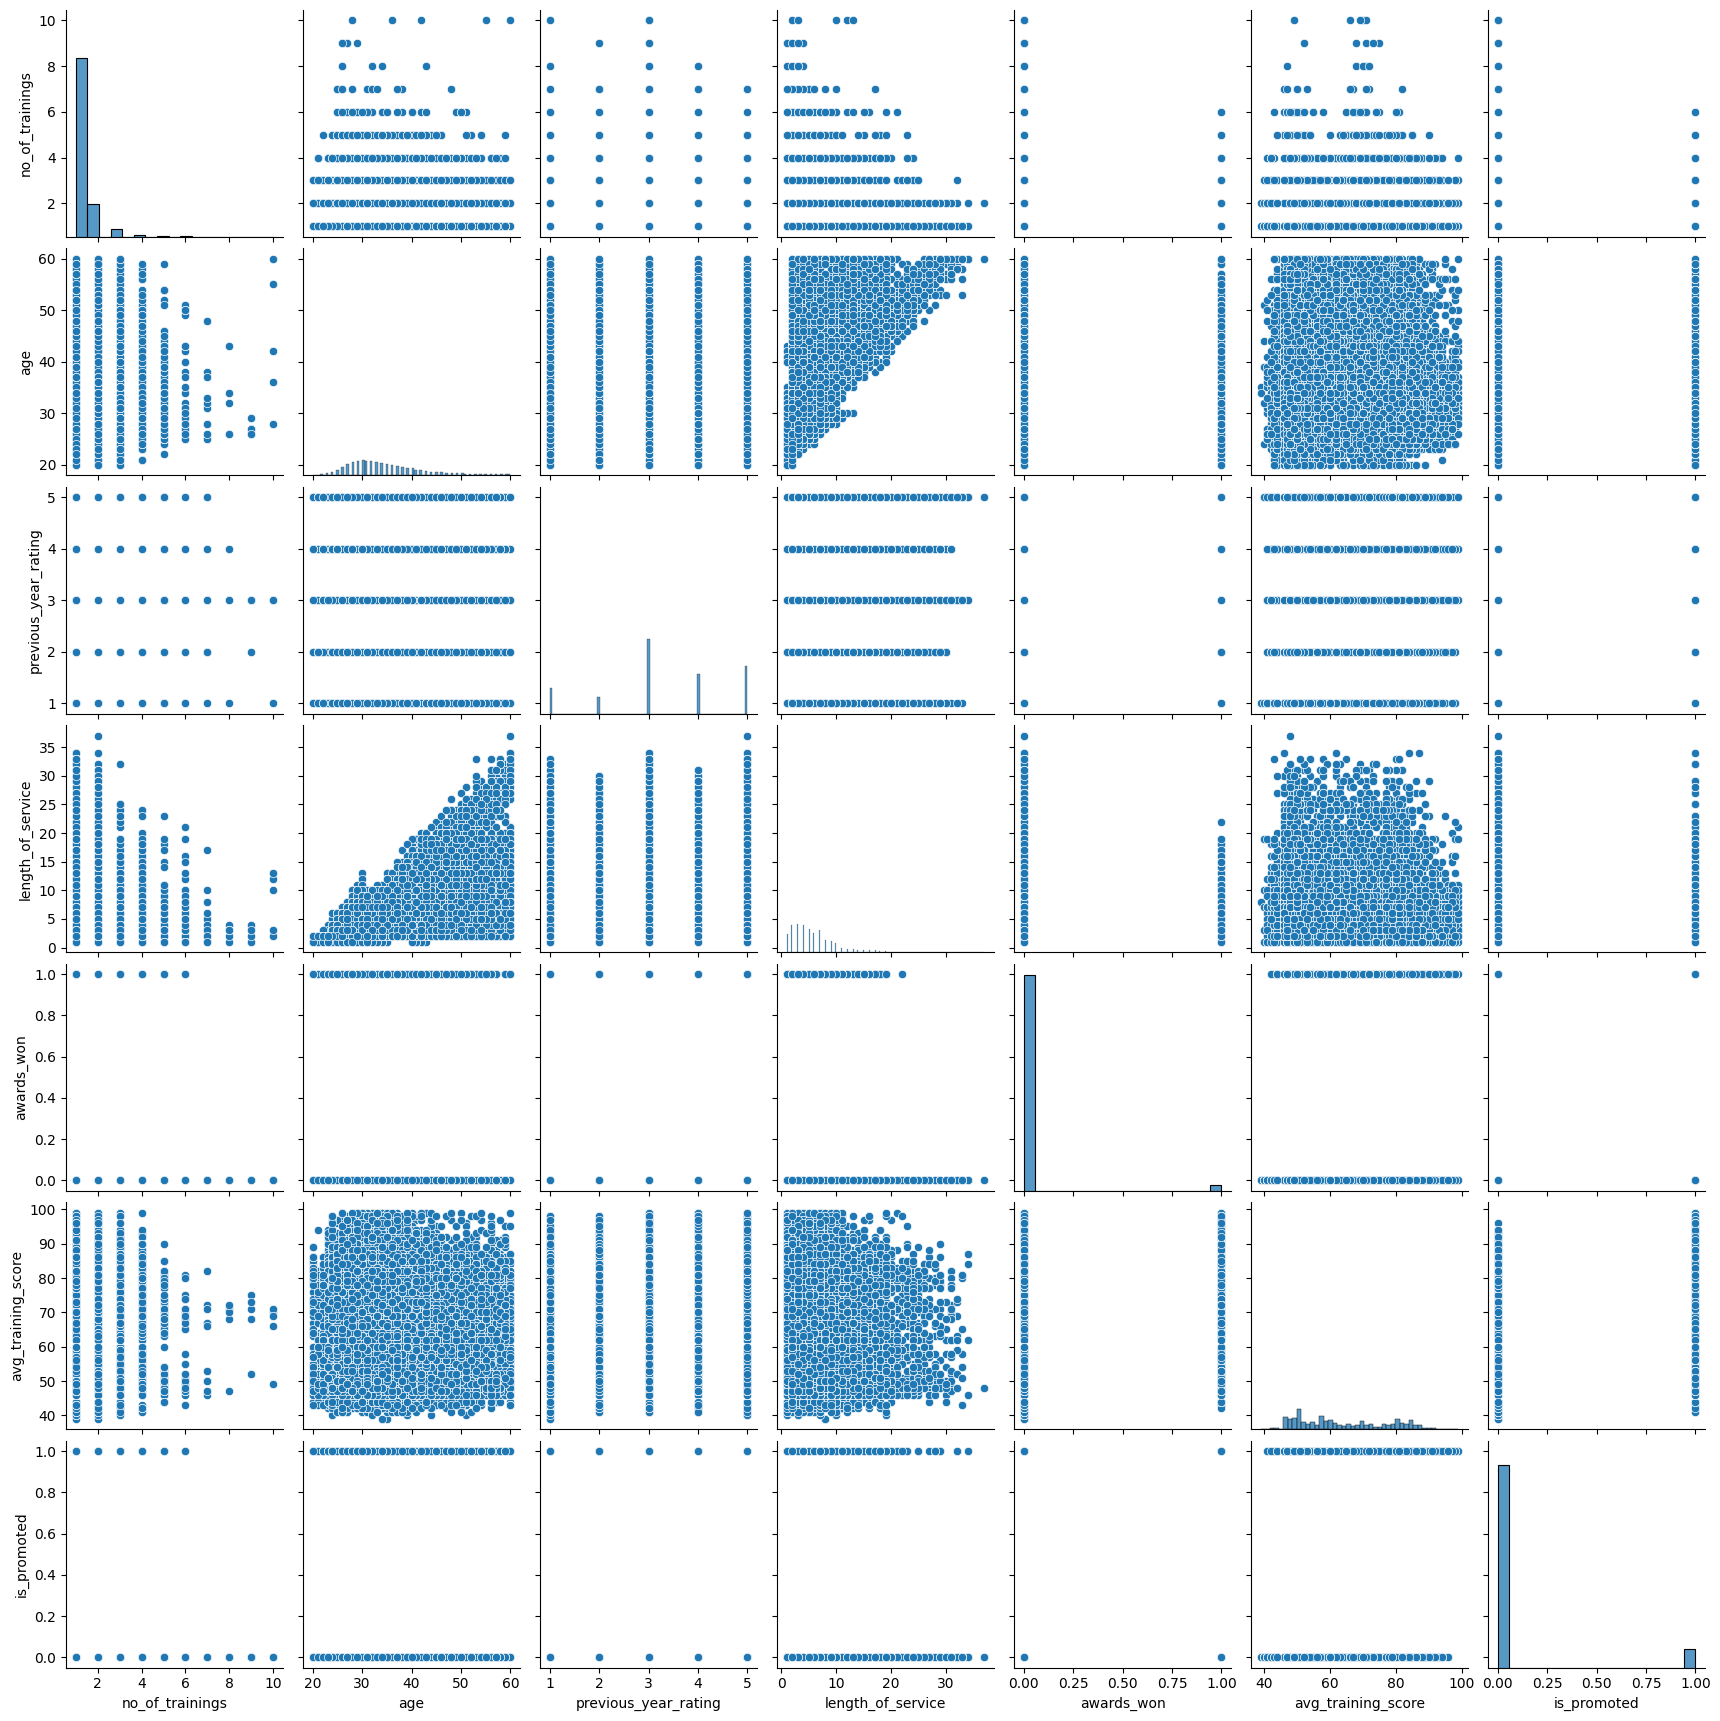

In [ ]:
sns.pairplot(df)

The relationship between categorical columns and class label is evaluated using Chi Square Test.

In [ ]:
from scipy.stats import chi2_contingency
contingency_table1 = pd.crosstab(df['is_promoted'], df['department'])
chi2, p, dof, expected = chi2_contingency(contingency_table1)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 151.42635516323872
P-value: 9.882497107474489e-29
Degrees of freedom: 8
Expected frequencies: [[ 4896.1699022   2320.00875785  2212.05882353   950.50831995
  10381.49029339  6530.05619618   913.91512188 15405.73638885
   6530.05619618]
 [  455.8300978    215.99124215   205.94117647    88.49168005
    966.50970661   607.94380382    85.08487812  1434.26361115
    607.94380382]]


In [ ]:
contingency_table2 = pd.crosstab(df['is_promoted'], df['region'])
chi2, p, dof, expected = chi2_contingency(contingency_table2)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 475.64023775792066
P-value: 7.275378205784026e-80
Degrees of freedom: 33
Expected frequencies: [[5.58046271e+02 5.92809809e+02 1.20300139e+03 4.57414976e+02
  2.42246971e+03 7.56564370e+02 2.56884250e+03 1.34022588e+03
  7.28204642e+02 2.83597285e+01 7.99561378e+02 1.12917461e+04
  7.77605459e+02 3.75995110e+02 5.88052693e+03 1.07492519e+03
  4.64733616e+02 7.49245731e+02 2.06751569e+03 1.51770289e+03
  1.20574588e+03 9.09340972e+02 3.16531163e+02 6.01043278e+02
  1.77019596e+03 8.64514304e+02 2.46089257e+02 2.67130346e+02
  1.55795541e+03 7.00759743e+02 6.31232667e+02 4.43052146e+03
  5.99213618e+02 3.84228580e+02]
 [5.19537294e+01 5.51901912e+01 1.11998613e+02 4.25850241e+01
  2.25530288e+02 7.04356298e+01 2.39157495e+02 1.24774121e+02
  6.77953583e+01 2.64027149e+00 7.44386221e+01 1.05125390e+03
  7.23945409e+01 3.50048898e+01 5.47473070e+02 1.00074807e+02
  4.32663845e+01 6.97542694e+01 1.92484309e+02 1.41297110e+02
  1.12254123e+02 8.46590279e+01 2.94688367e+

In [ ]:
contingency_table3 = pd.crosstab(df['is_promoted'], df['education'])
chi2, p, dof, expected = chi2_contingency(contingency_table3)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 36.70295913519633
P-value: 1.0716517784616584e-08
Degrees of freedom: 2
Expected frequencies: [[33487.69360102   735.1603084  13630.14609057]
 [ 3181.30639898    69.8396916   1294.85390943]]


In [ ]:
contingency_table4 = pd.crosstab(df['is_promoted'], df['gender'])
chi2, p, dof, expected = chi2_contingency(contingency_table4)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 6.677254566546107
P-value: 0.009765091521176657
Degrees of freedom: 1
Expected frequencies: [[14922.70617428 35217.29382572]
 [ 1389.29382572  3278.70617428]]


In [ ]:
contingency_table5 = pd.crosstab(df['is_promoted'], df['recruitment_channel'])
chi2, p, dof, expected = chi2_contingency(contingency_table5)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 19.23633518768639
P-value: 6.650937825577018e-05
Degrees of freedom: 2
Expected frequencies: [[27852.91271347  1044.73580499 21242.35148154]
 [ 2593.08728653    97.26419501  1977.64851846]]


Analysing each categorical features and graphically visualising them.

In [ ]:
df['department'].value_counts()

,count
department,
Sales & Marketing,16840
Operations,11348
Technology,7138
Procurement,7138
Analytics,5352
Finance,2536
HR,2418
Legal,1039
R&D,999


In [ ]:
df['region'].value_counts()

,count
region,
region_2,12343
region_22,6428
region_7,4843
region_15,2808
region_13,2648
region_26,2260
region_31,1935
region_4,1703
region_27,1659


In [ ]:
df['education'].value_counts()

,count
education,
Bachelor's,36669
Master's & above,14925
Below Secondary,805


In [ ]:
gender_count=df['gender'].value_counts()
gender_count

,count
gender,
m,38496
f,16312


In [ ]:
df['recruitment_channel'].value_counts()

,count
recruitment_channel,
other,30446
sourcing,23220
referred,1142


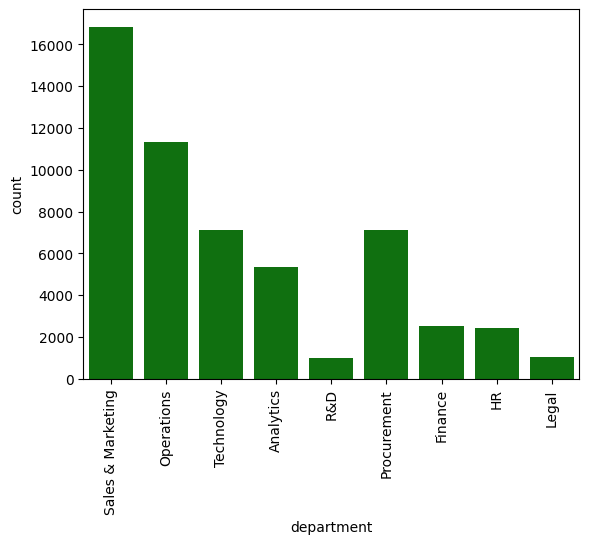

In [ ]:
sns.countplot(x='department', data=df,color='green')
plt.xticks(rotation=90)
plt.show()

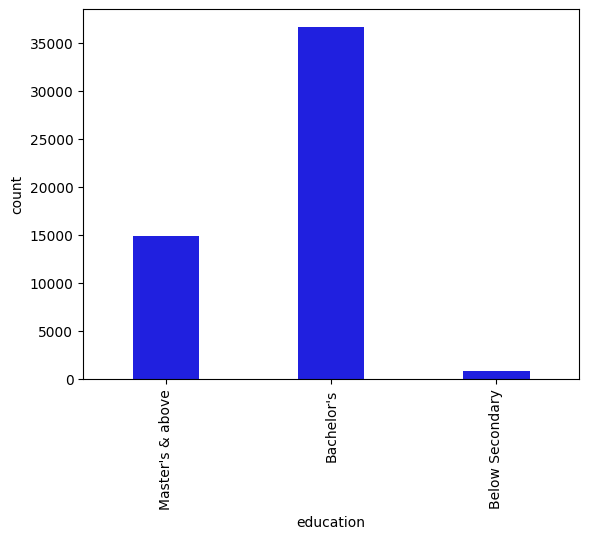

In [ ]:
sns.countplot(x='education', data=df,color='blue',width=0.4)
plt.xticks(rotation=90)
plt.show()

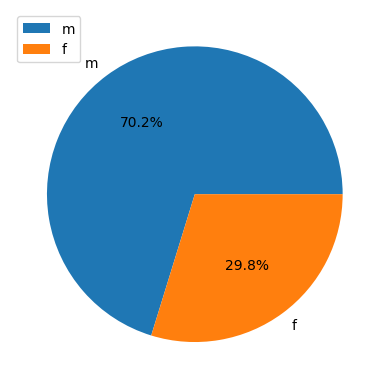

In [ ]:
plt.pie(x=gender_count.values,labels=gender_count.index,autopct='%1.01f%%')
plt.legend(loc='upper left')
plt.show()

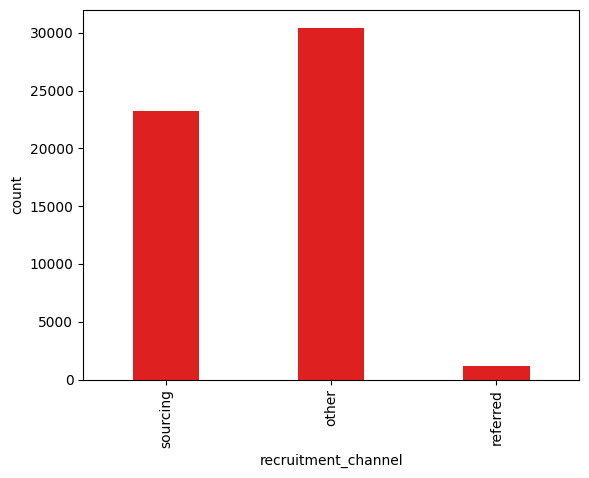

In [ ]:
sns.countplot(x='recruitment_channel', data=df,color='red',width=0.4)
plt.xticks(rotation=90)
plt.show()

Support of output column is evaluated.

In [ ]:
df['is_promoted'].value_counts()

,count
is_promoted,
0,50140
1,4668


From this it is evident that the dataset is imbalanced.

**Feature Selection**

Dropping columns no_of_trainings, age and length_of_service that has less correlation with the output columns and region column to reduce the model complexity

In [ ]:
df.drop(['no_of_trainings','age','length_of_service','region'],axis=1,inplace=True)
df.head()

,department,education,gender,recruitment_channel,previous_year_rating,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,5.0,0,49.0,0
1,Operations,Bachelor's,m,other,5.0,0,60.0,0
2,Sales & Marketing,Bachelor's,m,sourcing,3.0,0,50.0,0
3,Sales & Marketing,Bachelor's,m,other,1.0,0,50.0,0
4,Technology,Bachelor's,m,other,3.0,0,73.0,0


In [ ]:
df.isna().sum()

,0
department,0
education,2409
gender,0
recruitment_channel,0
previous_year_rating,4124
awards_won,0
avg_training_score,2560
is_promoted,0


Handling missing values by filling values and droping rows with missing data

In [ ]:
df['education']=df['education'].fillna(df['education'].mode()[0])
df['avg_training_score']=df['avg_training_score'].fillna(df['avg_training_score'].mean())
df.dropna(subset=['previous_year_rating'],inplace=True,ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50684 entries, 0 to 50683
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            50684 non-null  object 
 1   education             50684 non-null  object 
 2   gender                50684 non-null  object 
 3   recruitment_channel   50684 non-null  object 
 4   previous_year_rating  50684 non-null  float64
 5   awards_won            50684 non-null  int64  
 6   avg_training_score    50684 non-null  float64
 7   is_promoted           50684 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


Encoding the categorical value to numerical values using get dummies

In [ ]:
df1=pd.get_dummies(df[['department','education','gender','recruitment_channel']],drop_first=True,dtype=int)
df1

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50679,0,0,0,0,0,0,0,1,0,0,1,0,1
50680,0,0,0,1,0,0,0,0,0,1,0,0,0
50681,0,0,0,0,0,0,0,0,0,0,1,0,0
50682,0,0,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
df=pd.concat([df,df1],axis=1)
df

,department,education,gender,recruitment_channel,previous_year_rating,awards_won,avg_training_score,is_promoted,department_Finance,department_HR,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,Sales & Marketing,Master's & above,f,sourcing,5.0,0,49.000000,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,Operations,Bachelor's,m,other,5.0,0,60.000000,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,Sales & Marketing,Bachelor's,m,sourcing,3.0,0,50.000000,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,Sales & Marketing,Bachelor's,m,other,1.0,0,50.000000,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,Technology,Bachelor's,m,other,3.0,0,73.000000,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50679,Technology,Bachelor's,m,sourcing,3.0,0,78.000000,0,0,0,...,0,0,0,0,1,0,0,1,0,1
50680,Operations,Master's & above,f,other,2.0,0,56.000000,0,0,0,...,1,0,0,0,0,0,1,0,0,0
50681,Analytics,Bachelor's,m,other,5.0,0,79.000000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50682,Sales & Marketing,Bachelor's,m,sourcing,1.0,0,63.712238,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
df.drop(['department','education','gender','recruitment_channel'],axis=1,inplace=True)
df

,previous_year_rating,awards_won,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,5.0,0,49.000000,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,5.0,0,60.000000,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3.0,0,50.000000,0,0,0,0,0,0,0,1,0,0,0,1,0,1
3,1.0,0,50.000000,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,3.0,0,73.000000,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50679,3.0,0,78.000000,0,0,0,0,0,0,0,0,1,0,0,1,0,1
50680,2.0,0,56.000000,0,0,0,0,1,0,0,0,0,0,1,0,0,0
50681,5.0,0,79.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0
50682,1.0,0,63.712238,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
x=df.drop(['is_promoted'],axis=1)
x

,previous_year_rating,awards_won,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,5.0,0,49.000000,0,0,0,0,0,0,1,0,0,1,0,0,1
1,5.0,0,60.000000,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3.0,0,50.000000,0,0,0,0,0,0,1,0,0,0,1,0,1
3,1.0,0,50.000000,0,0,0,0,0,0,1,0,0,0,1,0,0
4,3.0,0,73.000000,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50679,3.0,0,78.000000,0,0,0,0,0,0,0,1,0,0,1,0,1
50680,2.0,0,56.000000,0,0,0,1,0,0,0,0,0,1,0,0,0
50681,5.0,0,79.000000,0,0,0,0,0,0,0,0,0,0,1,0,0
50682,1.0,0,63.712238,0,0,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
y=df['is_promoted']
y

,is_promoted
0,0
1,0
2,0
3,0
4,0
...,...
50679,0
50680,0
50681,0
50682,0


Dataset is imbalanced. Converting it into balaced using SMOTE technique.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x, y = smote.fit_resample(x, y)

In [ ]:
y.value_counts()

,count
is_promoted,
0,46355
1,46355


Splitting dataset into training and testing data.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,previous_year_rating,awards_won,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
33990,5.000000,0,74.0,0,0,0,0,1,0,0,0,0,1,0,0,1
15927,3.000000,0,47.0,0,0,0,0,0,0,1,0,0,1,1,0,1
79761,5.000000,0,81.0,0,0,0,0,0,0,0,1,0,0,1,0,1
71222,4.574649,0,54.0,0,0,0,0,0,0,1,0,0,0,0,0,0
59631,2.849529,0,85.0,0,0,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1.000000,0,67.0,0,0,0,0,1,0,0,0,0,0,1,0,1
54886,5.000000,0,53.0,0,0,0,0,0,0,1,0,0,0,1,0,1
76820,5.000000,0,75.0,0,0,0,0,0,0,0,0,0,1,0,1,0
860,5.000000,0,62.0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
x_test

,previous_year_rating,awards_won,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
9620,2.000000,0,63.712238,0,0,0,0,0,0,1,0,0,0,1,0,1
85856,5.000000,0,87.000000,0,0,0,0,0,0,0,0,0,0,1,0,0
72257,3.000000,0,48.000000,0,0,0,0,0,0,1,0,0,0,1,0,1
62256,4.799841,0,81.000000,0,0,0,0,0,0,0,1,0,0,1,0,0
92578,1.115705,0,56.115705,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53154,3.000000,0,63.000000,1,0,0,0,0,0,0,0,0,0,1,0,0
27349,4.000000,0,58.000000,0,0,0,1,0,0,0,0,0,0,0,0,1
47161,3.000000,0,47.000000,0,0,0,0,0,0,1,0,0,0,1,0,1
81396,5.000000,0,76.000000,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

,is_promoted
33990,0
15927,0
79761,1
71222,1
59631,1
...,...
6265,0
54886,1
76820,1
860,0


Normalising values using Standard Scalar

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)
x_train

array([[ 1.13430555, -0.19609103,  0.47242815, ..., -1.44860219,
        -0.11912153,  1.23577577],
       [-0.52725751, -0.19609103, -1.41104614, ...,  0.69032064,
        -0.11912153,  1.23577577],
       [ 1.13430555, -0.19609103,  0.96073629, ...,  0.69032064,
        -0.11912153,  1.23577577],
       ...,
       [ 1.13430555, -0.19609103,  0.54218645, ..., -1.44860219,
         8.39478808, -0.80920829],
       [ 1.13430555, -0.19609103, -0.36467154, ..., -1.44860219,
        -0.11912153, -0.80920829],
       [-0.52725751, -0.19609103, -0.22515492, ...,  0.69032064,
        -0.11912153,  1.23577577]])

In [ ]:
x_test

array([[-1.35803904, -0.19609103, -0.24522873, ...,  0.69032064,
        -0.11912153,  1.23577577],
       [ 1.13430555, -0.19609103,  1.37928614, ...,  0.69032064,
        -0.11912153, -0.80920829],
       [-0.52725751, -0.19609103, -1.34128784, ...,  0.69032064,
        -0.11912153,  1.23577577],
       ...,
       [-0.52725751, -0.19609103, -1.41104614, ...,  0.69032064,
        -0.11912153,  1.23577577],
       [ 1.13430555, -0.19609103,  0.61194476, ..., -1.44860219,
        -0.11912153, -0.80920829],
       [-0.36922853, -0.19609103,  0.89097799, ...,  0.69032064,
        -0.11912153, -0.80920829]])

Model creation using KNN, Naive Bayes, Support Vector, Decision Tree and Random Forest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
scores={}
print(classification_report(y_test,y_pred))
knn_score=accuracy_score(y_test,y_pred)
scores['KNN']=knn_score

              precision    recall  f1-score   support

           0       0.75      0.83      0.79     13856
           1       0.81      0.73      0.77     13957

    accuracy                           0.78     27813
   macro avg       0.78      0.78      0.78     27813
weighted avg       0.78      0.78      0.78     27813



In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(x_train,y_train)
y_pred1=nb.predict(x_test)
y_pred1

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred1))
scores['Naive_Bayes']=accuracy_score(y_test,y_pred1)

              precision    recall  f1-score   support

           0       0.62      0.61      0.62     13856
           1       0.62      0.63      0.62     13957

    accuracy                           0.62     27813
   macro avg       0.62      0.62      0.62     27813
weighted avg       0.62      0.62      0.62     27813



In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
y_pred2=sv.predict(x_test)
y_pred2

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred2))
scores['SVC']=accuracy_score(y_test,y_pred2)

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     13856
           1       0.77      0.66      0.71     13957

    accuracy                           0.73     27813
   macro avg       0.74      0.73      0.73     27813
weighted avg       0.74      0.73      0.73     27813



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(criterion='entropy')
dec.fit(x_train,y_train)
y_pred3=dec.predict(x_test)
y_pred3

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred3))
scores['Decision Tree']=accuracy_score(y_test,y_pred3)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     13856
           1       0.84      0.80      0.82     13957

    accuracy                           0.82     27813
   macro avg       0.82      0.82      0.82     27813
weighted avg       0.82      0.82      0.82     27813



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier(n_estimators=100,criterion='entropy')
rd.fit(x_train,y_train)
y_pred4=rd.predict(x_test)
y_pred4


array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred4))
scores['Random Forest']=accuracy_score(y_test,y_pred4)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     13856
           1       0.84      0.80      0.82     13957

    accuracy                           0.82     27813
   macro avg       0.82      0.82      0.82     27813
weighted avg       0.82      0.82      0.82     27813



{'KNN': 0.7787725164491425, 'Naive_Bayes': 0.6199618883256032, 'SVC': 0.730989105813828, 'Decision Tree': 0.8224571243663036, 'Random Forest': 0.8201560421385683}


<ipython-input-56-d8b6b86db959>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores.keys(),y=scores.values(),palette='Set2')


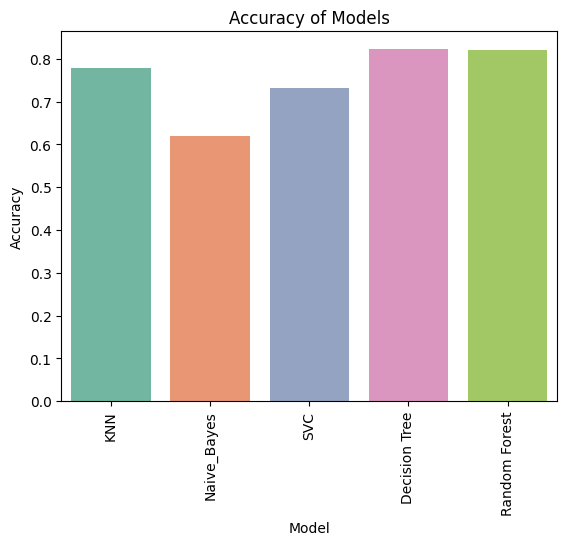

In [ ]:
print(scores)
sns.barplot(x=scores.keys(),y=scores.values(),palette='Set2')
plt.title("Accuracy of Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.show()

**RESULTS**

Performance of Decision tree classifier and random forest is almost similar with accuracy of 82% .Applying hyperparameter tuning to both of it to improve and analyse the performance

In [ ]:
from sklearn.model_selection import GridSearchCV
demodec=DecisionTreeClassifier()
param={'criterion':['gini', 'entropy','log_loss'],'splitter':['best', 'random']}
clf=GridSearchCV(demodec,param,cv=10,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'log_loss', 'splitter': 'best'}


In [ ]:
dec2=DecisionTreeClassifier(criterion='log_loss',splitter='best')
dec2.fit(x_train,y_train)
y_pred_dec=dec2.predict(x_test)
y_pred_dec

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred_dec))
tuned_accuray_dec=accuracy_score(y_test,y_pred_dec)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     13856
           1       0.84      0.80      0.82     13957

    accuracy                           0.82     27813
   macro avg       0.82      0.82      0.82     27813
weighted avg       0.82      0.82      0.82     27813



In [ ]:
rfc = RandomForestClassifier()
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_split': 2}


In [ ]:
rd2=RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=2)
rd2.fit(x_train,y_train)
y_pred_rd2=rd2.predict(x_test)
y_pred_rd2

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred_rd2))
tuned_accuracy_rf=accuracy_score(y_test,y_pred_rd2)

              precision    recall  f1-score   support

           0       0.81      0.84      0.82     13856
           1       0.84      0.80      0.82     13957

    accuracy                           0.82     27813
   macro avg       0.82      0.82      0.82     27813
weighted avg       0.82      0.82      0.82     27813



Text(0.5, 0.98, 'Comparison of Accuracy Score of Decision Tree and Random Forest')

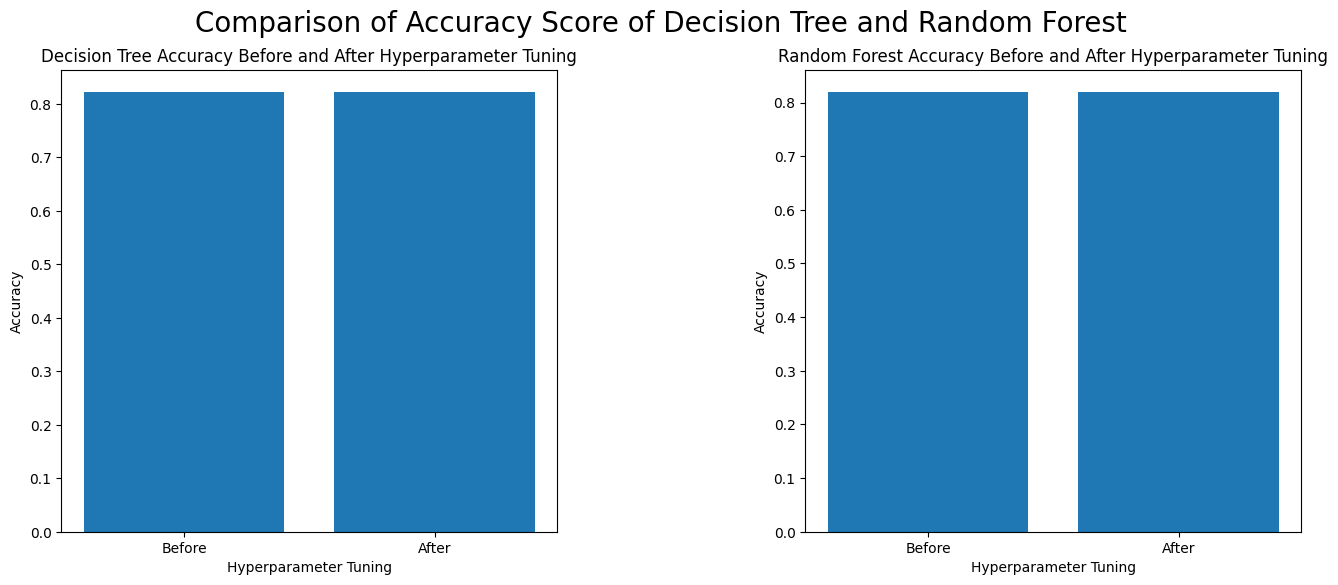

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.bar(['Before','After'],[scores['Decision Tree'],tuned_accuray_dec])
plt.title("Decision Tree Accuracy Before and After Hyperparameter Tuning")
plt.xlabel("Hyperparameter Tuning")
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.bar(['Before','After'],[scores['Random Forest'],tuned_accuracy_rf])
plt.title("Random Forest Accuracy Before and After Hyperparameter Tuning")
plt.xlabel("Hyperparameter Tuning")
plt.ylabel("Accuracy")

plt.subplots_adjust(hspace=0.50,wspace=0.50)
plt.suptitle("Comparison of Accuracy Score of Decision Tree and Random Forest",size=20)



**INSIGHTS**

HR Decision-Making: The predictive model can assist HR teams in making more informed and fair promotion decisions.

Employee Engagement: Data-driven promotion processes can enhance employee motivation and engagement by ensuring transparency and fairness.